# <span style="color:red">❤️ Heart Disease Prediction</span>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ConvertColumns import Processing, SingleColumn

%matplotlib inline
sns.set(rc={"figure.figsize":[4, 4]})

In [4]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.shape

(319795, 18)

In [4]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Convert to numerical Yes:1 ; No:0

In [5]:
# convert datatype into numeric
df["HeartDisease"] = df["HeartDisease"].apply(Processing.to_numeric)

df["Smoking"] = df["Smoking"].apply(Processing.to_numeric)
df["Stroke"] = df["Stroke"].apply(Processing.to_numeric)
df["AlcoholDrinking"] = df["AlcoholDrinking"].apply(Processing.to_numeric)
df["DiffWalking"] = df["DiffWalking"].apply(Processing.to_numeric)
df["Diabetic"] = df["Diabetic"].apply(Processing.DiabeticNumeric) # special convertable
df["Asthma"] = df["Asthma"].apply(Processing.to_numeric)
df["KidneyDisease"] = df["KidneyDisease"].apply(Processing.to_numeric)
df["SkinCancer"] = df["SkinCancer"].apply(Processing.to_numeric)
df["PhysicalActivity"] = df["PhysicalActivity"].apply(Processing.to_numeric)
df["AgeCategory"] = df["AgeCategory"].apply(Processing.AgeCategorized) 

### Convert categorical columns -> dummy variales

In [9]:
# convert Sex cat into dummy variable
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)
df[["Fair","Good","Poor","Very good"]] = pd.get_dummies(df["GenHealth"], drop_first= True)
df[["Asian","Black","Hispanic","Other","White"]] = pd.get_dummies(df["Race"], drop_first=True)

**After conversions**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  uint8  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [11]:
df["AgeCategory"].value_counts() / len(df) * 100

65-69          10.679029
60-64          10.533623
70-74           9.714036
55-59           9.305024
50-54           7.936960
80 or older     7.552651
45-49           6.814053
75-79           6.717428
18-24           6.586720
40-44           6.568583
35-39           6.425992
30-34           5.864069
25-29           5.301834
Name: AgeCategory, dtype: float64

In [13]:
df["AgeCategory"].value_counts() / len(df) * 100

10    10.679029
9     10.533623
11     9.714036
8      9.305024
7      7.936960
13     7.552651
6      6.814053
12     6.717428
1      6.586720
5      6.568583
4      6.425992
3      5.864069
2      5.301834
Name: AgeCategory, dtype: float64

**Delete Uncessary columns**

In [11]:
df.drop(["GenHealth", "Race"], axis=1, inplace=True)

# Balancing Class: raise minority class

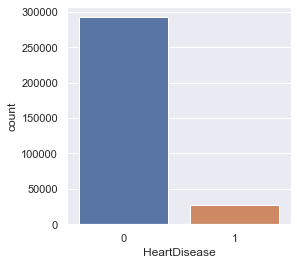

In [12]:
sns.countplot(df["HeartDisease"])
plt.show()

In [24]:
# majorit class of No HeartDisease 91%
df["HeartDisease"].value_counts() / len(df) * 100

0    91.440454
1     8.559546
Name: HeartDisease, dtype: float64

In [16]:
# Sperate the label
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [17]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

**Oversample using<span style="color:blue"> SMOTE </span>method** 

In [18]:
smote = SMOTE(k_neighbors = 3)
X_smoted, y_smoted = smote.fit_resample(X, y)

In [10]:
y_smoted.value_counts() / len(y_smoted)

0    0.5
1    0.5
Name: HeartDisease, dtype: float64

**Another techinque<span style="color:blue"> RandomOverSampler</span> method**

__Balance Class using OverSample strategey__

In [ ]:
ROS = RandomOverSampler(random_state=42)
X_sampled, y_sampled = ROS.fit_resample(X, y)

In [ ]:
y_sampled.value_counts() / len(y_sampled)

# <span style="color:orange"> Machine Learning </span>

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, random_state=42, test_size=1/65)

In [28]:
y_smoted.value_counts() / len(y_smoted)

0    0.5
1    0.5
Name: HeartDisease, dtype: float64

In [29]:
print(f"Testing size: {1/65}%\n")
print("Training X: ", X_train.shape)
print("Testing X: ", X_test.shape)
print("Training y: ", y_train.shape)
print("Testing y: ", y_test.shape)

Testing size: 0.015384615384615385%

Training X:  (575846, 46)
Testing X:  (8998, 46)
Training y:  (575846,)
Testing y:  (8998,)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
final_X = pd.DataFrame(X_scaled, columns =  X.columns)

final_X.shape == X_train.shape

True

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [23]:
RF = RandomForestClassifier(random_state = 42)
RF.fit(final_X, y_train)

RandomForestClassifier(random_state=42)

In [25]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [26]:
print("Model Name: 'RandomForestClassifier' ")
print(f"Model Accuracy Training Score: {RF.score(final_X, y_train)}")
print(f"Model Accuracy Testing Score: {RF.score(X_test_scaled, y_test)}")

Model Name: 'RandomForestClassifier' 
Model Accuracy Training Score: 0.9974802290890272
Model Accuracy Testing Score: 0.9257612802845077


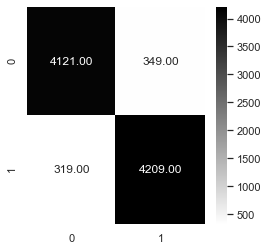

In [28]:
# predict y_test
predictions = RF.predict(X_test_scaled)

CM = confusion_matrix(y_test, predictions)
sns.heatmap(CM, annot=True, cmap = plt.cm.binary, fmt="0.2f")

In [29]:
print(f"Precision Score: {precision_score(y_test, predictions)} ")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")

Precision Score: 0.9234313295304958 
Recall Score: 0.9295494699646644
F1 Score: 0.9264802993616553


## Save models and make Pipeline

In [1]:
from joblib import load, dump # saving the model

### Deployment The Model

In [99]:
dump(RF, "RandomForestClassifier - HeartDisease.h5") # save the model
dump(scaler, "StandardScaler - HeartDisease.h5") # save the standard scaler

['StandardScaler - HeartDisease.h5']

__Load Model__

In [2]:
RFC = load("RandomForestClassifier - HeartDisease.h5")
SC = load("StandardScaler - HeartDisease.h5")

In [ ]:
X_scaled = pd.DataFrame(SC.transform(X_test), columns = X.columns)

In [ ]:
predictions = RFC.predict(X_scaled)
print(f"Precision Score: {precision_score(y_test, predictions)} ")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")

print("Model Name: 'RandomForestClassifier' ")
print(f"Model Accuracy Testing Score: {RFC.score(X_scaled, y_test)}")

# <span style = "color:dark gray" >TEST THE MODEL ON PRODUCTION APPLICATION</span>

In [80]:
columns = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Asian', 'Black', 'Hispanic', 'Other', 'White', 'Fair',
       'Good', 'Poor', 'Very good']

inserted_data = []

for col_name in columns:
    if col_name == "AgeCategory":
        print("{:_^50}".format("Age range: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80 "))
    elif col_name in ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "Asthma", "KidneyDisease", "SkinCancer","PhysicalActivity"]:
        print("{:_^50}".format("Yes or No"))
    elif col_name in ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]:
        print("{:_^50}".format("Chose range from 0-30"))
    elif col_name == "Sex":
        print("{:_^50}".format("Male or Female"))
    else:
        print("{:_^70}".format("Choose only one Type 1 means Yes and define all 0`s"))
    inserted = input(f"Describe your health on pos {len(inserted_data)}: {col_name} \t")
    
    inserted_data.append(inserted)

test_data = pd.DataFrame(pd.Series(np.array(inserted_data))).T
test_data.columns = columns

for col_name in ["Smoking","AlcoholDrinking","Stroke","DiffWalking", "SkinCancer", "Diabetic", "PhysicalActivity", "Asthma","KidneyDisease"]:
    test_data[col_name] = test_data[col_name].apply(lambda x: 1 if x == "Yes" else 0)

test_data['AgeCategory'] = test_data['AgeCategory'].apply(SingleColumn.AgeCategory)
test_data["Sex"] = test_data["Sex"].apply(lambda x: 1 if x == "Male" else 0)

# predict Heart Health
scaled = SC.transform(test_data)

patient_descriptions = pd.DataFrame(scaled, columns =  columns)

PredictHealth = RFC.predict(patient_descriptions)

if PredictHealth[0] == 0:
    print("\n You are Healthy you didn`t have HeartDisease")
    
elif PredictHealth[0] == 1:
    print("\n Sorry you have had HeartDisease you should talk to your doctor immediately")
    

________Define your health 'Fair','Good', 'Poor', 'Very good' ________
Describe your health on pos 0: Health 	a
______________________________Your race_______________________________
Describe your health on pos 1: Race 	White


In [81]:
inserted_data

['a', 'Asian', 'Black', 'Hispanic', 'Other', 'White']